# 🔥 Introduction to `PyTorch` -- The basics

[Deep Learning](https://dsai.units.it/index.php/courses/deep-learning/) Course @ [UniTS](https://portale.units.it/en), Spring 2024

<a target="_blank" href="https://colab.research.google.com/github/emaballarin/deeplearning-units/blob/main/labs/01_intro_to_pytorch/01_pytorch_basics.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>  <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/emaballarin/deeplearning-units/blob/main/labs/01_intro_to_pytorch/01_pytorch_basics.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

### An aside on *programming*

![image.png](https://ballarin.cc/code.jpg)
<br><sub><sup>From <a href="https://www.commitstrip.com/en/2016/08/25/a-very-comprehensive-and-precise-spec/">CommitStrip.com (August 25th, 2016)</a></sup></sub>

### What is PyTorch?

[PyTorch](https://pytorch.org/) (sometimes referred to simply as `torch`) is a Python/C++ library for:
- Efficient numerical computing, with support for strong GPU acceleration & parallelism;
- Automatic algorithmic differentiation (mainly in *reverse mode*, *tape-based*; but more recently also in *forward mode*);
- Development of deep artificial neural network models (*a.k.a.* *deep learning*);

It is also well integrated with the *scientific Python stack* (*i.e.* NumPy *& friends*).

The flexibility of PyTorch and its *Pythonic* interfaces make it the most widely adopted framework for research and development, both in academia and industry (especially industrial *R&D*).

For more info about PyTorch, you can have a look at the [official documentation](https://pytorch.org/docs/stable/index.html) or refer to [this book](https://bucket.ballarin.cc/books/EStevens_LAntiga_TViehmann_DeepLearningWithPyTorch.pdf).  
For insights about the inner workings of *autodiff*, you can start exploring the topic from [this survey](https://arxiv.org/abs/1502.05767).

### Preliminary infrastucture setup

In [1]:
import os

FOLDERNAME: str = "deeplearning_units_2024"
try:
    if os.getenv("COLAB_RELEASE_TAG"):
        # noinspection PyUnresolvedReferences
        from google.colab import drive

        drive.mount(BASEPATH := "/content/drive")
        os.makedirs(FULLPATH := BASEPATH + "/MyDrive/" + FOLDERNAME, exist_ok=True)
    elif os.getenv("KAGGLE_CONTAINER_NAME"):
        os.makedirs(FULLPATH := "/kaggle/working/" + FOLDERNAME, exist_ok=True)
    else:
        os.makedirs(FULLPATH := "./" + FOLDERNAME, exist_ok=True)
    os.chdir(FULLPATH)
except (ModuleNotFoundError, FileExistsError, FileNotFoundError):
    pass

In [2]:
!python -m pip install -q pip_install_if_missing

In [3]:
from piim import pip_install_if_missing

pip_install_if_missing("icecream")

In [4]:
# Pretty printouts
from icecream import ic

ic.configureOutput(outputFunction=print)
ic.configureOutput(prefix="    | ")

### Some imports

In [5]:
# It all begins with...
import torch as th  # (or simply `import torch`)

import numpy as np  # For comparison

import matplotlib.pyplot as plt  # For plotting

# For type annotations
from torch import Tensor
from numpy.typing import NDArray
from typing import Any

## Basic operation with `Tensor`s

The main building block of PyTorch's linear algebra capabilities is the `Tensor` class. A torch `Tensor` is the (loose) equivalent of NumPy's `ndarray` and most of the functionalities are the same as in NumPy. In general, it is always possible to perform the same logical/mathematical operations typical of NumPy on torch `Tensor`s.

In [6]:
# Creation of tensors
x: Tensor = th.tensor([[1, 2, 3], [4, 5, 6]])
y: NDArray[Any] = np.array([[1, 2, 3], [4, 5, 6]])

_ = ic(x)
_ = ic(y)

    | x: tensor([[1, 2, 3],
                 [4, 5, 6]])
    | y: array([[1, 2, 3],
                [4, 5, 6]])


In [7]:
# Shapes and sizes
_ = ic(x.size())
_ = ic(x.shape)

_ = ic(y.shape)

    | x.size(): torch.Size([2, 3])
    | x.shape: torch.Size([2, 3])
    | y.shape: (2, 3)


In [8]:
# (d)types
_ = ic(x.dtype)
_ = ic(y.dtype)

    | x.dtype: torch.int64
    | y.dtype: dtype('int64')


You can convert the dtype of a tensor by using `Tensor` methods `float()`, `int()`, etc.... or by using the `to(dtype=...)` method:

In [9]:
print("dtype of x before casting:", x.dtype)
x: Tensor = x.float()
print("dtype of x after casting:", x.dtype)

dtype of x before casting: torch.int64
dtype of x after casting: torch.float32


In [10]:
# Or with more granular control
x: Tensor = x.to(dtype=th.float16)
print("dtype of x:", x.dtype)

dtype of x: torch.float16


Note that you can build a tensor through the constructor `th.Tensor` (as opposed to `torch.tensor`, mind the capitalisation!). In this case, since `th.Tensor` is an alias for `th.FloatTensor`, the tensor you create will have type `th.float32`.

More info on `Tensor` data types: [here](https://pytorch.org/docs/stable/tensors.html).

You can create random tensors, just like you create random arrays in `NumPy`:

In [11]:
x: Tensor = th.rand(
    2, 3, 2
)  # also accepts a list or tuple of integers (e.g. th.rand([2, 3, 2]), etc...)
y: NDArray[Any] = np.random.rand(2, 3, 2)

_ = ic(x)
_ = ic(y)

    | x: tensor([[[0.7769, 0.0846],
                  [0.4548, 0.0464],
                  [0.1297, 0.9028]],
         
                 [[0.0904, 0.8221],
                  [0.2002, 0.7155],
                  [0.9655, 0.2986]]])
    | y: array([[[0.40086487, 0.10657909],
                 [0.24272468, 0.80838863],
                 [0.36487569, 0.6011585 ]],
         
                [[0.54170548, 0.59253929],
                 [0.39455227, 0.41815543],
                 [0.84336664, 0.45164046]]])


Tensor slicing works like in NumPy, by means of square brackets:

In [12]:
x: Tensor = th.rand(2, 3, 2)
_ = ic(x)

    | x: tensor([[[0.8004, 0.0786],
                  [0.4510, 0.0847],
                  [0.7182, 0.0773]],
         
                 [[0.6749, 0.1689],
                  [0.3764, 0.5971],
                  [0.7649, 0.2591]]])


In [13]:
_ = ic(x[0, 1, 1])

_ = ic(x[0, 1:, 1])

_ = ic(x[:, ::2, :])

    | x[0, 1, 1]: tensor(0.0847)
    | x[0, 1:, 1]: tensor([0.0847, 0.0773])
    | x[:, ::2, :]: tensor([[[0.8004, 0.0786],
                             [0.7182, 0.0773]],
                    
                            [[0.6749, 0.1689],
                             [0.7649, 0.2591]]])


Beware of 0-dimensional vs 1-dimensional tensors:

In [14]:
_ = ic(x[0, 1, 1].shape)

_ = ic(th.tensor(3.14).shape)

_ = ic(th.tensor([3.14]).shape)

    | x[0, 1, 1].shape: torch.Size([])
    | th.tensor(3.14).shape: torch.Size([])
    | th.tensor([3.14]).shape: torch.Size([1])


You can use the `numel` method to get the number of elements (*i.e.* scalars) in a tensor:

In [15]:
# Use of `numel`
_ = ic(x.numel())

_ = ic(th.tensor(3.14).numel())

_ = ic(th.tensor([3.14]).numel())

    | x.numel(): 12
    | th.tensor(3.14).numel(): 1
    | th.tensor([3.14]).numel(): 1


### Tensor reshaping

Changing the shape of a tensor can be a crucial operation.  
To have an idea of its application, just think of `RGB` images. These may be represented as $3\times \text{H}\times \text{W}$ tensors, where $\text{H}$ and $\text{W}$ stand for height and width of the image (in number of pixels). It is often needed to look at an image as a flattened (1D) vector of pixels:

In [16]:
img: Tensor = th.stack(
    tensors=(th.ones(8, 8), th.zeros(8, 8), th.ones(8, 8) / 2), dim=0
)

# Note that reshaping is not in place, so this call does not change the actual shape of img!
img.reshape(3, 64)

_ = ic(img.shape)

img2: Tensor = img.reshape(3, 64)
_ = ic(img2.shape)

    | img.shape: torch.Size([3, 8, 8])
    | img2.shape: torch.Size([3, 64])


When you reshape a tensor, you can leave one dimension unspecified (using `-1`, at most **once**), as it will be inferred automatically.

In [17]:
img_inferred: Tensor = img.reshape(3, -1)
_ = ic(img_inferred.shape)

    | img_inferred.shape: torch.Size([3, 64])


Let's print the "image" (it should be a **uniformly pink** square)...

In [18]:
# plt.imshow(img)
# It errors with "TypeError: Invalid shape (3, 8, 8) for image data"

In fact, `matplotlib` expects arrays in the $\text{H}\times \text{W}\times \text{C}$, whereas `PyTorch` uses the $\text{C}\times \text{H}\times \text{W}$ format.

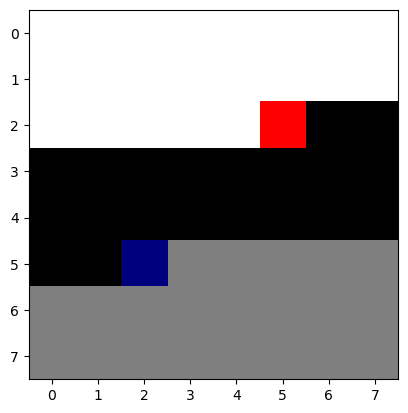

In [19]:
new_img: Tensor = img.reshape(8, 8, 3)
_ = plt.imshow(new_img.numpy())

**Why is it not pink?** 🤔

`reshape` only modifies the shape of a `Tensor`, without changing the way data are stored in memory. The "right" way to change the order of dimensions is to use the `permute` method, which reorders dimensions in-memory.

**Note**

Difference between:
- `view`: operations on contiguous memory;
- `reshape`: operations on (non-)contiguous memory, using `view` wherever possible;
- `permute`: explicit reordering of dimensions and memory;
- `.contiguous()`: ensure that the tensor is stored in contiguous memory (copying if necessary), with no other modification.

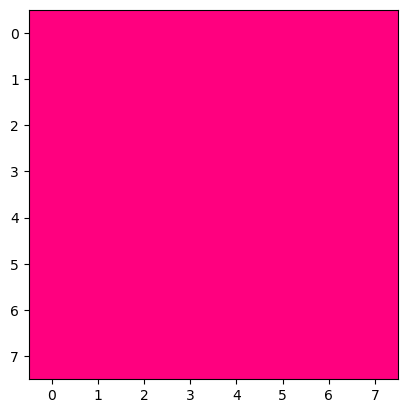

In [20]:
new_img: Tensor = img.permute(1, 2, 0)
_ = plt.imshow(new_img.numpy())

Another memory-contiguity quirk...

In [21]:
z: Tensor = th.tensor([[1, 2, 3], [4, 5, 6]])
y: Tensor = z.t()  # Transposition does not guarantee memory contiguity!
_ = ic(y.size())
# _ = ic(y.view(6))   # It errors, as memory is not contiguously-addressed!
_ = ic(y.contiguous().view(6))  # This works! Or use `reshape` instead of `view`.

    | y.size(): torch.Size([3, 2])
    | y.contiguous().view(6): tensor([1, 4, 2, 5, 3, 6])


### Arithmetic operations

As in NumPy, PyTorch supports all the basic arithmetic operations. By default, these operations are performed **element-wise**.

In [22]:
x: Tensor = th.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
y: Tensor = th.tensor([[7.0, 8.0, 9.0], [10.0, 11.0, 12.0]])

_ = ic(x + y)
_ = ic(x / y)

_ = ic(x**2)

    | x + y: tensor([[ 8., 10., 12.],
                     [14., 16., 18.]])
    | x / y: tensor([[0.1429, 0.2500, 0.3333],
                     [0.4000, 0.4545, 0.5000]])
    | x**2: tensor([[ 1.,  4.,  9.],
                    [16., 25., 36.]])


### Linear algebra

An operation we will frequently perform in Deep Learning (often under the hood, though) is **matrix multiplication**. In `torch`, it can be done in many equivalent ways:

In [23]:
x: Tensor = th.rand(4, 5)
y: Tensor = x.T  # matrix transposition; also .t()

# All the same!
_ = ic(x @ y)
_ = ic(x.matmul(y))
_ = ic(th.matmul(x, y))

    | x @ y: tensor([[1.3022, 1.8816, 1.5542, 0.7764],
                     [1.8816, 3.9750, 3.2299, 1.9686],
                     [1.5542, 3.2299, 3.2673, 1.9320],
                     [0.7764, 1.9686, 1.9320, 1.3239]])
    | x.matmul(y): tensor([[1.3022, 1.8816, 1.5542, 0.7764],
                           [1.8816, 3.9750, 3.2299, 1.9686],
                           [1.5542, 3.2299, 3.2673, 1.9320],
                           [0.7764, 1.9686, 1.9320, 1.3239]])
    | th.matmul(x, y): tensor([[1.3022, 1.8816, 1.5542, 0.7764],
                               [1.8816, 3.9750, 3.2299, 1.9686],
                               [1.5542, 3.2299, 3.2673, 1.9320],
                               [0.7764, 1.9686, 1.9320, 1.3239]])


Please note that the operator for matrix multiplication is `@`, not `*`, which indicates the Hadamard (element-wise) product instead.

In [24]:
_ = ic(x * x)

    | x * x: tensor([[0.7443, 0.2166, 0.0433, 0.0038, 0.2943],
                     [0.6410, 0.8486, 0.9616, 0.6439, 0.8800],
                     [0.7451, 0.0018, 0.9627, 0.5686, 0.9892],
                     [0.1835, 0.0028, 0.3137, 0.6661, 0.1578]])


Likewise, the power operator `**` is element-wise, not matrix-wise!

In [25]:
x: Tensor = th.rand(4, 4)

_ = ic(x**2)  # or x.pow(2)
_ = ic(x @ x)

    | x**2: tensor([[9.7437e-02, 2.2440e-02, 1.8799e-04, 7.9556e-01],
                    [3.8397e-01, 6.2569e-01, 5.5958e-05, 6.6242e-01],
                    [1.8631e-01, 2.9277e-01, 4.6576e-01, 1.1243e-02],
                    [3.0416e-01, 9.7715e-01, 1.5597e-01, 2.4504e-01]])
    | x @ x: tensor([[0.6881, 1.0544, 0.3670, 0.8433],
                     [1.1357, 1.5271, 0.3409, 1.6002],
                     [0.8231, 0.9667, 0.5176, 0.9502],
                     [1.2282, 1.5676, 0.4800, 1.5834]])


As in NumPy, there exists a `dot` function to compute the scalar product between vectors. Note that, differently from NumPy, in `torch` this is not equivalent to matrix multiplication, and works only with 1D vectors!

In [26]:
v1: Tensor = x[0, :]
v2: Tensor = x[1, :]

_ = ic(th.dot(v1, v2))

# _ = ic(th.dot(x, x)) # It errors!

    | th.dot(v1, v2): tensor(1.0380)


### Reduction operations

You can easily compute statistics of tensors (or general *reduction operations*, *e.g.* sum, mean, max, min, stddev... of the elements) by either using `torch` functions, or same-named `Tensor` methods:

In [27]:
x: Tensor = th.rand(2, 3, 2)
_ = ic(x)

    | x: tensor([[[0.7081, 0.9061],
                  [0.9037, 0.7638],
                  [0.5618, 0.6298]],
         
                 [[0.9965, 0.0240],
                  [0.1430, 0.3248],
                  [0.4945, 0.9744]]])


In [28]:
_ = ic(x.sum())
_ = ic(th.sum(x))

    | x.sum(): tensor(7.4306)
    | th.sum(x): tensor(7.4306)


In [29]:
_ = ic(x.mean())
_ = ic(th.mean(x))

    | x.mean(): tensor(0.6192)
    | th.mean(x): tensor(0.6192)


In [30]:
_ = ic(x.argmin())
_ = ic(th.min(x))

    | x.argmin(): tensor(7)
    | th.min(x): tensor(0.0240)


It is sometimes useful to specify one or more dimensions to reduce (along which you want to perform your operations):

In [31]:
_ = ic(x.mean(dim=0))
_ = ic(x.argmax(dim=1))
_ = ic(x.sum(dim=(0, 1)))

    | x.mean(dim=0): tensor([[0.8523, 0.4651],
                             [0.5234, 0.5443],
                             [0.5281, 0.8021]])
    | x.argmax(dim=1): tensor([[1, 0],
                               [0, 2]])
    | x.sum(dim=(0, 1)): tensor([3.8076, 3.6230])


## GPU acceleration

PyTorch is designed to work seamlessly with GPUs (or hardware accelerators in general). You can move tensors to the GPU by using the `cuda` method, or the `to` method (for general devices, including CUDA, CPU, and others).

In [32]:
x: Tensor = th.rand(2, 3)
_ = ic(x)
_ = ic(x.device)

    | x: tensor([[0.2781, 0.3753, 0.6223],
                 [0.8820, 0.0418, 0.7441]])
    | x.device: device(type='cpu')


In [33]:
x: Tensor = x.to(device="cuda")  # or x.cuda()
_ = ic(x)
_ = ic(x.device)

    | x: tensor([[0.2781, 0.3753, 0.6223],
                 [0.8820, 0.0418, 0.7441]], device='cuda:0')
    | x.device: device(type='cuda', index=0)


#### Why GPUs?

Let's see...

In [34]:
a: Tensor = th.rand(1000, 1000)
b: Tensor = th.rand(1000, 1000)
_ = ic(th.matmul(a, b))  # Warmup (does not cache the result)

    | th.matmul(a, b): tensor([[258.0005, 254.4070, 245.5527,  ..., 254.2750, 239.6226, 237.5657],
                               [255.4604, 253.7073, 253.1129,  ..., 257.4288, 248.4121, 242.5365],
                               [260.7802, 250.5148, 253.5165,  ..., 257.1263, 248.7137, 250.3953],
                               ...,
                               [262.9264, 250.4629, 245.3529,  ..., 259.7427, 242.8599, 247.1555],
                               [252.9386, 248.2101, 243.1014,  ..., 254.4837, 244.5975, 237.2432],
                               [254.5945, 249.9155, 249.6635,  ..., 256.2055, 246.5348, 239.3554]])


In [35]:
# On CPU
for _ in range(1000):
    r: Tensor = th.matmul(a, b)

In [36]:
a_cuda: Tensor = a.cuda()
b_cuda: Tensor = b.cuda()
_ = ic(th.matmul(a_cuda, b_cuda))  # Warmup (does not cache the result)

    | th.matmul(a_cuda, b_cuda): tensor([[258.0005, 254.4070, 245.5528,  ..., 254.2749, 239.6226, 237.5657],
                                         [255.4603, 253.7073, 253.1130,  ..., 257.4287, 248.4122, 242.5365],
                                         [260.7802, 250.5148, 253.5165,  ..., 257.1264, 248.7137, 250.3954],
                                         ...,
                                         [262.9264, 250.4630, 245.3529,  ..., 259.7426, 242.8599, 247.1555],
                                         [252.9385, 248.2101, 243.1014,  ..., 254.4837, 244.5974, 237.2432],
                                         [254.5945, 249.9156, 249.6635,  ..., 256.2055, 246.5349, 239.3554]],
                                        device='cuda:0')


In [37]:
# On GPU
for _ in range(1000):
    r: Tensor = th.matmul(a_cuda, b_cuda)

A >12x speedup, just by moving the computation to the GPU!